In [14]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [15]:
data = "../../data/cleaned_data.xlsx"

astronaut_df = pd.read_excel(data, sheet_name="astronauts")
astronaut_df.head()

,number,name,sex,year_of_birth,nationality,military_civilian,selection,year_of_selection,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,eva,eva_hrs_mission
0,1,"Gagarin, Yuri",male,1934,U.S.S.R/Russia,military,TsPK-1,1960,pilot,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,0,0.0
1,2,"Titov, Gherman",male,1935,U.S.S.R/Russia,military,TsPK-1,1960,pilot,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,0,0.0
2,3,"Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,1959,pilot,1962,MA-6,MA-6,MA-6,MA-6,5.00,0,0.0
3,3,"Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,1959,psp,1998,STS-95,STS-95,STS-95,STS-95,213.00,0,0.0
4,4,"Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,1959,pilot,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,0,0.0


In [16]:
res = astronaut_df.groupby('name').filter(lambda x: len(x['number'].unique()) > 1)[['name', 'nationality']]
print("Astronaut who participated in space program of different countries:", *res['name'].unique())
print("Name of the different space agencies participated for: ", *res['nationality'].unique())

Astronaut who participated in space program of different countries: Aleksandrov, Aleksandr
Name of the different space agencies participated for:  U.S.S.R/Russia Bulgaria


In [17]:
astronaut_df.groupby('name').size().sort_values(ascending=False)

name
Chang-Diaz, Franklin R.     7
Ross, Jerry L.              7
Malenchenko, Yuri           6
Krikalev, Sergei            6
Musgrave, Franklin Story    6
                           ..
Gaffney, Andrew             1
Furukawa, Satoshi           1
Prokopyev, Sergei           1
Rakesh Sharma               1
Zudov, Vyacheslav           1
Length: 564, dtype: int64

In [18]:
astronaut_df.groupby('nationality').size().sort_values(ascending=False)

nationality
U.S.                        854
U.S.S.R/Russia              273
Japan                        20
Canada                       18
France                       18
Germany                      16
China                        14
Italy                        13
U.K./U.S.                     6
Australia                     4
Switzerland                   4
Belgium                       3
Netherland                    3
Bulgaria                      2
Spain                         2
U.K.                          2
Sweden                        2
Saudi Arabia                  1
Slovakia                      1
Afghanistan                   1
Syria                         1
Republic of South Africa      1
U.S.S.R/Ukraine               1
UAE                           1
Romania                       1
Malysia                       1
Poland                        1
Mongolia                      1
Mexico                        1
Korea                         1
Kazakhstan                  

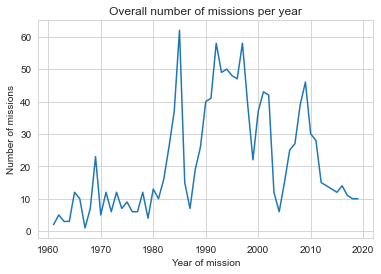

In [19]:
num_of_missions_per_year = astronaut_df.groupby(['year_of_mission', 'nationality']).size().sum(level=0)
num_of_missions_per_year = num_of_missions_per_year.reset_index(name='num_of_missions')
sns.lineplot(
    data=num_of_missions_per_year, 
    x='year_of_mission', 
    y='num_of_missions'
).set(
    title='Overall number of missions per year',
    xlabel='Year of mission', 
    ylabel='Number of missions'
)
plt.savefig("../../charts/overall_number_of_missions_per_year.png")

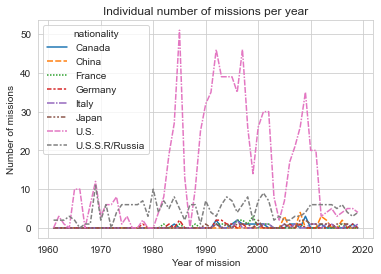

In [20]:
x = astronaut_df.groupby(['year_of_mission', 'nationality']).size().reset_index(name="num_of_missions_per_year")
data = pd.pivot_table(x, index='year_of_mission', columns='nationality', aggfunc=sum, fill_value=0)['num_of_missions_per_year']
data = data.loc[:, data.sum(axis=0) > 10].copy()
sns.lineplot(
    data=data
).set(
    title='Individual number of missions per year',
    xlabel='Year of mission', 
    ylabel='Number of missions'
)
plt.savefig("../../charts/individual_number_of_missions_per_year.png")

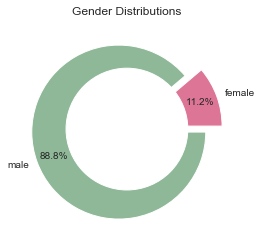

In [21]:
groupby_sex = astronaut_df.groupby(['sex']).size().reset_index(name="count")
explode = (0.1, 0.1)
plt.pie(groupby_sex['count'], labels=groupby_sex['sex'],
        autopct='%1.1f%%', pctdistance=0.8,
        explode=explode, colors=['#DD7596', '#8EB897'])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Gender Distributions')
plt.savefig("../../charts/gender_distribution.png")
plt.show()

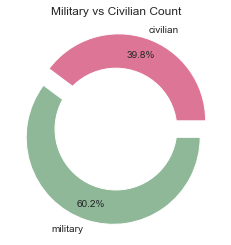

In [22]:
groupby_role = astronaut_df.groupby(['military_civilian']).size().reset_index(name="count")
explode = (0.1, 0.1)
plt.pie(groupby_role['count'], labels=groupby_role['military_civilian'],
        autopct='%1.1f%%', pctdistance=0.8,
        explode=explode, colors=['#DD7596', '#8EB897'])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Military vs Civilian Count')
plt.savefig("../../charts/military_vs_civilian_count.png")
plt.show()

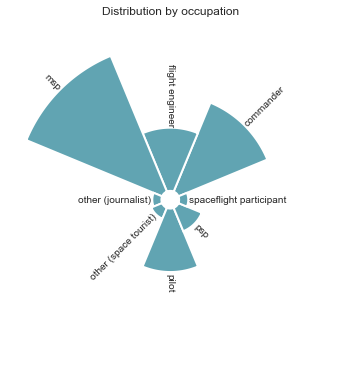

In [23]:
groupby_occupation = astronaut_df.groupby(['occupation']).size().reset_index(name="count")
upperLimit = 100
lowerLimit = 30
max = groupby_occupation['count'].max()
slope = (max - lowerLimit) / max
heights = slope * groupby_occupation['count'] + lowerLimit
width = 2*np.pi / len(groupby_occupation.index)
indexes = list(range(1, len(groupby_occupation.index)+1))
angles = [element * width for element in indexes]
plt.figure(figsize=(15,6))
ax = plt.subplot(111, polar=True)
plt.axis('off')
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)
labelPadding = 4
for bar, angle, height, label in zip(bars,angles, heights, groupby_occupation['occupation']):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
plt.title('Distribution by occupation')
plt.savefig("../../charts/distribution_by_occupation.png", bbox_inches='tight')
plt.show()

In [ ]:
astronaut_df.groupby(['sex', 'nationality']).size().reset_index(name='count')

In [ ]:
sns.histplot(data=astronaut_df, x='occupation').set(
    title='Occupation Distribution',
    xlabel='Occupation', 
    ylabel='Count'
)
plt.xticks(rotation=50)
plt.savefig("../../charts/occupation_distribution.png", bbox_inches='tight')
plt.show()

In [ ]:
astronaut_df.groupby('nationality')['selection'].unique()

In [ ]:
data = {
    'nationality': astronaut_df['nationality'],
    'age': astronaut_df['year_of_mission'] - astronaut_df['year_of_birth']
}
sns.boxplot(data=pd.DataFrame(data), x='nationality', y='age', palette="Set3")
plt.xticks(rotation=90)
plt.savefig("../../charts/astonauts_in_space_by_age.png", bbox_inches='tight')
plt.show()

In [ ]:
df1 = pd.pivot_table(astronaut_df, index=['nationality'], values=['hours_mission'], aggfunc=np.sum)
df1['total_missions'] = astronaut_df.groupby('nationality').size()
df1 = df1.assign(average_mission_time=lambda x: x['hours_mission']/x['total_missions'])
df1 = df1.loc[df1['average_mission_time'] > 300]

In [ ]:
upperLimit = 100
lowerLimit = 30
max = df1['average_mission_time'].max()
slope = (max - lowerLimit) / max
heights = slope * df1['average_mission_time'] + lowerLimit
width = 2*np.pi / len(df1.index)
indexes = list(range(1, len(df1.index)+1))
angles = [element * width for element in indexes]
ax = plt.subplot(111, polar=True)
plt.axis('off')
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color="#61a4b2",
)
labelPadding = 4
for bar, angle, height, label in zip(bars, angles, heights, df1.index):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation += 180
    else: 
        alignment = "left"
        
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
plt.title('Average amount of time spent per mission (least average 500 Hrs)')
plt.savefig("../../charts/average_amount_of_time_spent_per_mission.png", bbox_inches='tight')
plt.show()

In [ ]:
astronaut_df.groupby(['nationality'])['eva', 'eva_hrs_mission'].sum().reset_index()

In [ ]:
missions_per_year = astronaut_df.groupby(['year_of_mission']).size().reset_index(name='missions')
sns.lineplot(data=missions_per_year, x="year_of_mission", y="missions").set(
    title="Number of missions per year",
    xlabel="Year",
    ylabel="Number of mission"
)
plt.savefig("../../charts/number_of_missions_per_year.png", bbox_inches='tight')
plt.show()

In [ ]:
# This concluded there is no correlation/redundancy among variables
sns.heatmap(astronaut_df.corr())
plt.savefig("../../charts/correlation_plot.png", bbox_inches='tight')
plt.title("Correlation plot")
plt.show()